<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [3]:
# Isi dengan data diri Anda
NAMA = "Riris Melissa Winona Togatorop"
KELAS = "E"
NPM = "1906398906"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [4]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Riris Melissa Winona Togatorop dari kelas E dengan NPM 1906398906, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Riris Melissa Winona Togatorop)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [6]:
mobilePhone = pd.read_csv("mobile_phone.csv")

In [7]:
mobilePhone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2021 non-null   int64  
 1   blue           2021 non-null   int64  
 2   clock_speed    1920 non-null   float64
 3   dual_sim       2021 non-null   int64  
 4   fc             2021 non-null   int64  
 5   four_g         2021 non-null   int64  
 6   int_memory     1915 non-null   float64
 7   m_dep          1928 non-null   float64
 8   mobile_wt      2021 non-null   int64  
 9   n_cores        2021 non-null   int64  
 10  pc             2021 non-null   int64  
 11  px_height      2021 non-null   int64  
 12  px_width       2021 non-null   int64  
 13  ram            1927 non-null   float64
 14  sc_h           2021 non-null   int64  
 15  sc_w           2021 non-null   int64  
 16  talk_time      1937 non-null   float64
 17  three_g        2021 non-null   int64  
 18  touch_sc

In [8]:
duplicate = mobilePhone[mobilePhone.duplicated(keep='last')]
print(duplicate)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
18             1131     1          0.5         1  11       0        49.0   
25              503     0          NaN         1   5       1         8.0   
38              589     1          NaN         1   1       0        61.0   
61             1757     0          0.5         0   8       0        49.0   
73             1757     0          0.5         0   8       0        49.0   
87             1757     0          0.5         0   8       0        49.0   
103            1665     1          0.5         0   3       1        60.0   
124            1665     1          0.5         0   3       1        60.0   
140            1665     1          0.5         0   3       1        60.0   
158             506     0          1.6         0   6       1        41.0   
176             506     0          1.6         0   6       1        41.0   
190             506     0          1.6         0   6       1        41.0   
207         

<AxesSubplot:>

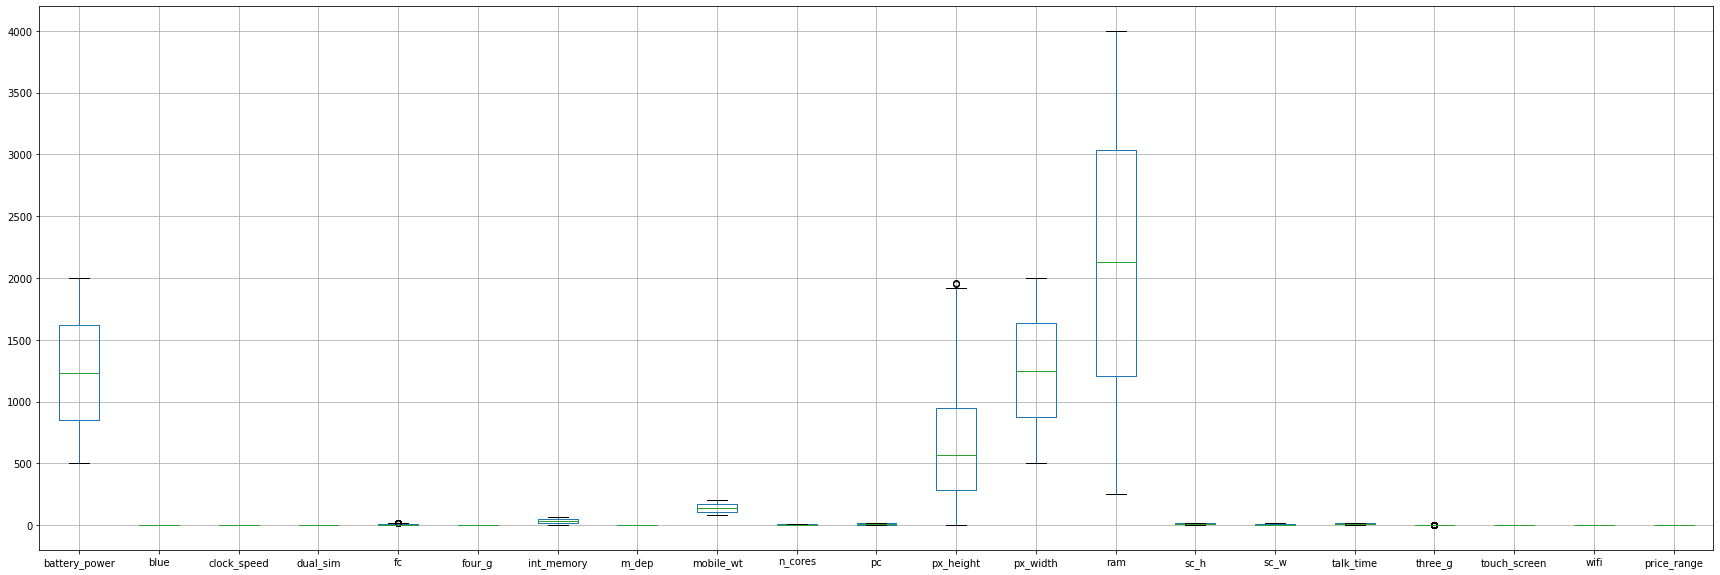

In [9]:
# Cek keberadaan outlier
mobilePhone.boxplot(figsize=(30,10))

In [10]:
# Menampilkan jumlah outliers pada data

Q1 = mobilePhone.quantile(0.25)
Q3 = mobilePhone.quantile(0.75)
IQR = Q3 - Q1
print("Jumlah outliers:")
print(((mobilePhone < (Q1 - 1.5*IQR)) | (mobilePhone > (Q3 + 1.5*IQR))).sum())

Jumlah outliers:
battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          480
touch_screen       0
wifi               0
price_range        0
dtype: int64


In [11]:
# Melihat jumlah missing value untuk setiap atribut
col_na = mobilePhone.isna().sum().sort_values(ascending=False)

missing_data = pd.concat([col_na], axis=1, keys=['Number of Missing Values'])
print(missing_data[missing_data['Number of Missing Values'] > 0])

              Number of Missing Values
int_memory                         106
clock_speed                        101
wifi                                99
touch_screen                        96
ram                                 94
m_dep                               93
talk_time                           84


2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

In [12]:
# Berdasarkan eksplorasi pada nomor 1, yang perlu dilakukan adalah
# Penangan data duplikat saja karena terdapat beberapa data yang duplikat dengan cara mendrop data
mobilePhone = mobilePhone.drop_duplicates()
mobilePhone

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756,2549.0,9,7,NaN,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,NaN,141,2,...,1208,1212,1411.0,8,2,15.0,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890,668.0,13,4,19.0,1,1.0,0.0,0
2017,1965,1,2.6,1,0,0,39.0,NaN,187,4,...,915,1965,2032.0,11,10,16.0,1,1.0,1.0,2
2018,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632,3057.0,9,1,5.0,1,1.0,0.0,3
2019,1512,0,0.9,0,4,1,46.0,NaN,145,5,...,336,670,869.0,18,10,19.0,1,1.0,1.0,0


In [13]:
# Mengatasi missing values pada attribut numerik
mobilePhone['int_memory'].fillna((mobilePhone['int_memory'].mean()), inplace=True)
mobilePhone['clock_speed'].fillna((mobilePhone['clock_speed'].mean()), inplace=True)
mobilePhone['ram'].fillna((mobilePhone['ram'].mean()), inplace=True)
mobilePhone['m_dep'].fillna((mobilePhone['m_dep'].mean()), inplace=True)
mobilePhone['talk_time'].fillna((mobilePhone['talk_time'].mean()), inplace=True)

# Mengatasi missing values pada attribut kategorik
mobilePhone['wifi'].fillna((mobilePhone['wifi'].mode().values[0]), inplace=True)
mobilePhone['touch_screen'].fillna((mobilePhone['touch_screen'].mode().values[0]), inplace=True)

In [14]:
# Terdapat 477 outliers pada three_g, atribut three_g merupakan atribut kategorik sehingga tidak perlu ditangani
# Terdapat 18 outliers pada fc, atribut three_g merupakan atribut numerik sehingga perlu ditangani
# Terdapat 2 outliers pada fc, atribut three_g merupakan atribut numerik sehingga perlu ditangani

In [15]:
# Mengatasi outliers
col = mobilePhone.select_dtypes(np.number).columns

for c in col:
    q1 = mobilePhone[c].quantile(0.1)
    q9 = mobilePhone[c].quantile(0.9)
    
    mobilePhone[c] = np.where(mobilePhone[c] < q1, q1, mobilePhone[c])
    mobilePhone[c] = np.where(mobilePhone[c] > q9, q9, mobilePhone[c])

In [16]:
# Menampilkan jumlah outliers pada data

Q1 = mobilePhone.quantile(0.25)
Q3 = mobilePhone.quantile(0.75)
IQR = Q3 - Q1
print("Jumlah outliers:")
print(((mobilePhone < (Q1 - 1.5*IQR)) | (mobilePhone > (Q3 + 1.5*IQR))).sum())

Jumlah outliers:
battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          477
touch_screen       0
wifi               0
price_range        0
dtype: int64


3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


> Jawaban: 

Menurut saya perlu, karena data yang digunakan memiliki skala yang berbeda-beda sehingga diperlukan normalisasi.
Dan untuk normalisasi yang digunakan standarization ketika karakteristik kumpulan data yang digunakan sangat berbeda di antara rangenya.

4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_raw = mobilePhone.drop(["price_range"],axis=1)
y = mobilePhone["price_range"]

selector = SelectKBest(f_classif, k=10) # memilih 11 atribut terbaik
X = selector.fit_transform(X_raw, y)
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

Jumlah feature (sebelum dilakukan feature selection ) : 20
Jumlah feature (setelah dilakukan feature selection ) : 10


array(['battery_power', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
       'px_height', 'px_width', 'ram', 'sc_h', 'talk_time'], dtype=object)

5\. [6] Apa saja fitur-fitur yang terpilih hasil dari *feature selection*? Jelaskan strategi Anda dalam memilih fitur-fitur tersebut dan berikan analisis mengapa fitur tersebut cocok digunakan untuk mengklasifikasi label target!

> Jawaban: 

> 

Adapun fitur-fitur yang terpilih dalam feature selection ini adalah: ['battery_power', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'talk_time'], saya menggunakan modul SelectKBest yang disediakan sklear untuk membantu pemilihan fitur. Fitur-fitur tersebut cocok karena mempengaruhi harga dari sebuah hp.

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [18]:
X = mobilePhone.iloc[:, 2:-1].values
y = mobilePhone. iloc [:, 1].values
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

Matrix of features
[[2.2 0.  1.  ... 0.  0.  1. ]
 [0.5 1.  0.  ... 1.  1.  0. ]
 [0.5 1.  2.  ... 1.  1.  0. ]
 ...
 [0.9 1.  1.  ... 1.  1.  0. ]
 [0.9 0.  4.  ... 1.  1.  1. ]
 [2.  1.  5.  ... 1.  1.  1. ]]
--------------------------------------------------
Target Variable
[0. 1. 1. ... 0. 0. 1.]


In [19]:
#  K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, X, y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=X,
                               y=y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

#Referensi: https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

### [19] Decision Tree

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [20]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_result = cross_validation(decision_tree_model, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.515 , 0.49  , 0.4425, 0.455 , 0.4925]), 'Mean Validation Accuracy': 47.9, 'Validation Precision scores': array([0.51041667, 0.48453608, 0.44019139, 0.45238095, 0.48756219]), 'Mean Validation Precision': 0.47501745562727615, 'Validation Recall scores': array([0.49494949, 0.47474747, 0.46464646, 0.47979798, 0.49494949]), 'Mean Validation Recall': 0.48181818181818176, 'Validation F1 scores': array([0.5025641 , 0.47959184, 0.45208845, 0.46568627, 0.49122807]), 'Mean Validation F1 Score': 0.4782317472144982}


8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

In [21]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(min_samples_leaf=50)
decision_tree_result = cross_validation(decision_tree_model, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([0.62625 , 0.626875, 0.61375 , 0.62125 , 0.616875]), 'Mean Training Accuracy': 62.09999999999999, 'Training Precision scores': array([0.6218593 , 0.64617691, 0.60984848, 0.6159601 , 0.59551761]), 'Mean Training Precision': 0.6178724804034847, 'Training Recall scores': array([0.625     , 0.54419192, 0.60984848, 0.62373737, 0.70454545]), 'Mean Training Recall': 0.6214646464646465, 'Training F1 scores': array([0.62342569, 0.59081563, 0.60984848, 0.61982434, 0.6454598 ]), 'Mean Training F1 Score': 0.6178747898639833, 'Validation Accuracy scores': array([0.5275, 0.4825, 0.49  , 0.495 , 0.52  ]), 'Mean Validation Accuracy': 50.3, 'Validation Precision scores': array([0.52380952, 0.47457627, 0.48469388, 0.49009901, 0.51293103]), 'Mean Validation Precision': 0.49722194338614667, 'Validation Recall scores': array([0.5       , 0.42424242, 0.47979798, 0.5       , 0.6010101 ]), 'Mean Validation Recall': 0.501010101010101, 'Validation F1 scores': array([0.51162791

9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Berdasarkan model yang dibuat pada nomor 7 dan 8, model yang lebih baik adalah model no 8 karena F1 scorenya lebih tinggi.

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

In [22]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     min_samples_leaf=100)
decision_tree_result = cross_validation(decision_tree_model, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([0.58375 , 0.5925  , 0.57625 , 0.588125, 0.585   ]), 'Mean Training Accuracy': 58.5125, 'Training Precision scores': array([0.56923077, 0.59210526, 0.57744565, 0.57888493, 0.59411765]), 'Mean Training Precision': 0.5823568532756443, 'Training Recall scores': array([0.6540404 , 0.56818182, 0.53661616, 0.61616162, 0.51010101]), 'Mean Training Recall': 0.577020202020202, 'Training F1 scores': array([0.60869565, 0.57989691, 0.55628272, 0.5969419 , 0.54891304]), 'Mean Training F1 Score': 0.5781460442812444, 'Validation Accuracy scores': array([0.5325, 0.515 , 0.52  , 0.49  , 0.5325]), 'Mean Validation Accuracy': 51.800000000000004, 'Validation Precision scores': array([0.52380952, 0.51111111, 0.51530612, 0.48598131, 0.53107345]), 'Mean Validation Precision': 0.5134563024217027, 'Validation Recall scores': array([0.61111111, 0.46464646, 0.51010101, 0.52525253, 0.47474747]), 'Mean Validation Recall': 0.5171717171717172, 'Validation F1 scores': array([0.56410

### [18] Random Forest

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier_model = RandomForestClassifier()
random_forest_classifier_result = cross_validation(random_forest_classifier_model, X, y, 5)
print(random_forest_classifier_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.5025, 0.47  , 0.46  , 0.4725, 0.495 ]), 'Mean Validation Accuracy': 48.0, 'Validation Precision scores': array([0.49723757, 0.46315789, 0.4494382 , 0.46060606, 0.48863636]), 'Mean Validation Precision': 0.4718152180574462, 'Validation Recall scores': array([0.45454545, 0.44444444, 0.4040404 , 0.38383838, 0.43434343]), 'Mean Validation Recall': 0.4242424242424242, 'Validation F1 scores': array([0.47493404, 0.45360825, 0.42553191, 0.41873278, 0.45989305]), 'Mean Validation F1 Score': 0.4465400059506199}


12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> 


### [16] Naive Bayes

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya? 

> Jawaban:

> 

16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Jawaban:

> 

### [12] K-nearest Neighbors

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. ... 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Jawaban:

> 